## Observations
1. Capomulin was the best performing drug overall. Showing the largest decreases in tumor volume over time, the fewest metastatic sites over time and showed the best survival rates of the mice compared to the others. 
2. Ketapril was the overall worst performing drug with the largest percent of tumor growth, the highest average number of metastatic sites and the largest average tumor volume at the end of the study.
3. The drugs Infubinol and Ketapril did not prove to be more effective than the placebo. 
4. Capomulin was the only drug with 100% of mice still living after 10 days into the study. 

In [64]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [65]:
trial_data = pd.read_csv('clinicaltrial_data.csv')
mouse_data = pd.read_csv('mouse_drug_data.csv')

In [66]:
trial_mouse_drug_data = pd.merge(trial_data, mouse_data, on='Mouse ID', how='outer')
trial_mouse_drug_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Volume Response to Treatment

In [67]:
#group by drug and timepoint and show the mean tumor volume
grouped_drug_timepoint = trial_mouse_drug_data.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)'].unstack(['Drug'])
focus_drug = grouped_drug_timepoint[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
focus_drug.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


In [68]:
#find sem of tumor vol
sem_tumor_volume = trial_mouse_drug_data.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)'].unstack(['Drug'])
focus_sem_volume = sem_tumor_volume[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
focus_sem_volume.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609


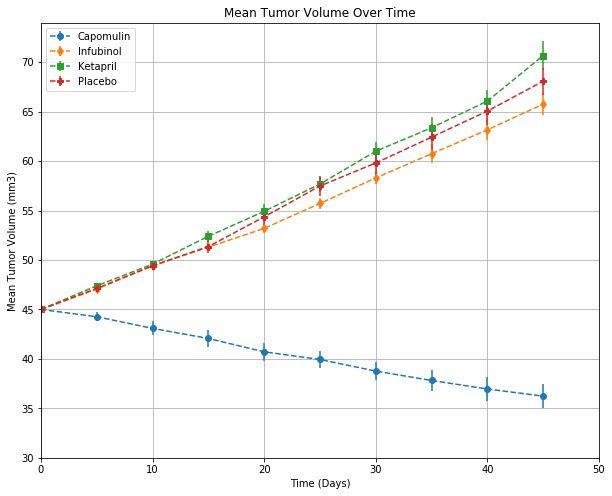

In [69]:
#create the plot showing tumor volume change over time
#create the graph and make it bigger
fig, ax = plt.subplots(figsize=(10, 8))

#make lists of the drug names and the markers I want to use for each line
columns = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
markers = ['o', 'd', 's', 'P']

#loop through the two lists above and plot the lines for the tumor volume over time for each drug with the sem of tumor volume
for col, marker in zip(columns, markers):
    ax.errorbar(focus_drug.index, focus_drug[col], focus_sem_volume[col], marker=marker, linestyle='dashed', label=col)

ax.legend(loc='upper left')
plt.title('Mean Tumor Volume Over Time')
plt.xlabel('Time (Days)')
plt.ylabel('Mean Tumor Volume (mm3)')
plt.xlim(0, 50)
plt.ylim(30, )
plt.grid() 
plt.show()

## Metastatic Site Response to Treatment

In [70]:
#group the dataframe by drug and timepoint and take the mean of the metastatic sites for each timepoint
mean_met_size = trial_mouse_drug_data.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites'].unstack(['Drug'])
focus_met = mean_met_size[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
focus_met.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316


In [71]:
#get the standard error of the metastatic sites
sem_met_size = trial_mouse_drug_data.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites'].unstack(['Drug'])
focus_sem_met = sem_met_size[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
focus_sem_met.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064


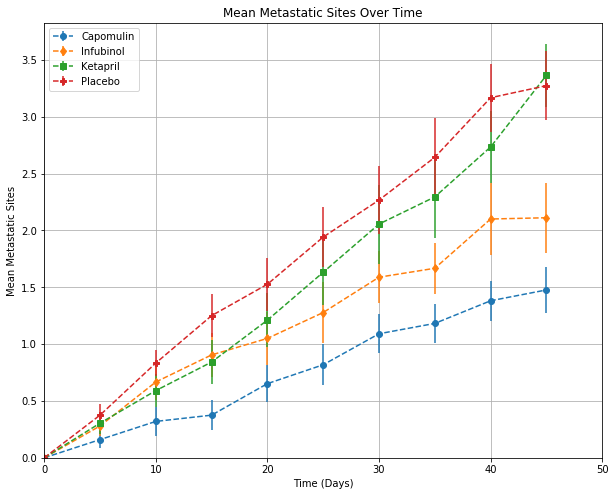

In [72]:
#create the scatter plot and make it bigger
fig, ax = plt.subplots(figsize=(10, 8))

#make lists of the drug names and markers for the for loop
columns = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
markers = ['o', 'd', 's', 'P']

#loop through the lists and plot the data
for col, marker in zip(columns, markers):
    ax.errorbar(focus_met.index, focus_met[col], focus_sem_met[col], marker=marker, linestyle='dashed', label=col)

plt.legend(loc='upper left')
plt.title('Mean Metastatic Sites Over Time')
plt.xlabel('Time (Days)')
plt.ylabel('Mean Metastatic Sites')
plt.xlim(0, 50)
plt.ylim(0, )
plt.grid()
plt.show()

## Survival Rates

In [73]:
#find the number of mice alive for each drug at each timepoint
mouse_count = trial_mouse_drug_data.groupby(['Drug', 'Timepoint']).count()['Mouse ID'].unstack(['Drug'])
mouse_count_focus = mouse_count[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
mouse_count_focus.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19


In [74]:
#calculate the percent survival rates and save to a new df
survival_rates = (mouse_count_focus / mouse_count_focus.iloc[0])*100

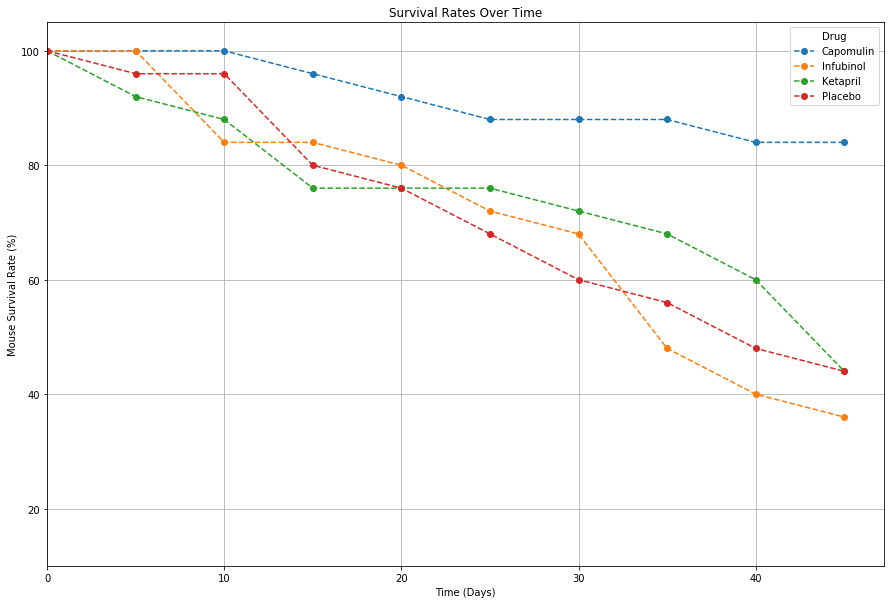

In [75]:
#plot the survival rates for each drug over time
survival_rates.plot(marker='o', linestyle='dashed', figsize=(15, 10))
plt.title('Survival Rates Over Time')
plt.xlabel('Time (Days)')
plt.ylabel('Mouse Survival Rate (%)')
plt.xlim(0, )
plt.ylim(10, 105)
plt.grid()

## Percent tumor volume change for each drug

In [76]:
#calculate percent change in tumor volume for each drug and display
change_tumor_volume = ((focus_drug.iloc[9] - focus_drug.iloc[0]) / focus_drug.iloc[0]) * 100
change_tumor_volume

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

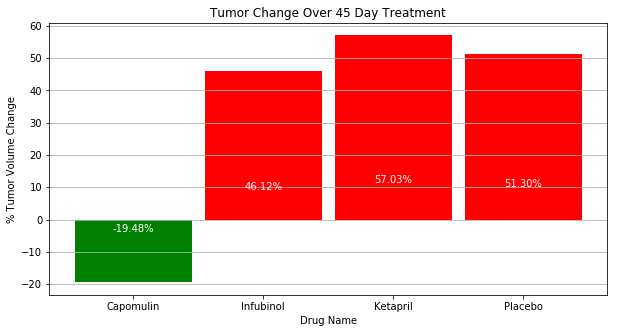

In [77]:
#set x and y axis values and make the graph size larger
plt.figure(figsize=(10, 5))
x_axis = change_tumor_volume.index
y = change_tumor_volume

#display graph with green for postive performers (negative growth) and red for negative performers (positive growth)
rects = plt.bar(x_axis, y, color=np.where(change_tumor_volume>0,'r','g'), width=0.9)

#format graph and add labels I purposely made mine look different from the example becuase I disagree with the
#example putting the tick labels off-centered from the bar. It makes it difficult to know which bar the tick label is referencing
plt.grid(axis='y')
plt.title('Tumor Change Over 45 Day Treatment')
plt.xlabel('Drug Name')
plt.ylabel('% Tumor Volume Change')

def autolabel(rects):
    for rect, volume in zip(rects, y):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 0.2*height, '%.2f%%'%volume, ha='center', color='white')
autolabel(rects)
